<a href="https://colab.research.google.com/github/VISHNU-ARAVIND-99/Airbnb_Data_Analysis/blob/main/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pymongo import MongoClient
import urllib.parse
import sqlite3

In [ ]:
username = urllib.parse.quote_plus("vishnuaravind")
password = urllib.parse.quote_plus("vishnuaravind")

client = MongoClient(f"mongodb+srv://{username}:{password}"
                         f"@vishnuaravind.se3bvtj.mongodb.net/?retryWrites=true&w=majority")
db = client["sample_airbnb"]
coll = db["listingsAndReviews"]
document = coll.find_one()
document

# viewing only one document from mogodb

{'_id': '10006546',
 'listing_url': 'https://www.airbnb.com/rooms/10006546',
 'name': 'Ribeira Charming Duplex',
 'summary': 'Fantastic duplex apartment with three bedrooms, located in the historic area of Porto, Ribeira (Cube) - UNESCO World Heritage Site. Centenary building fully rehabilitated, without losing their original character.',
 'space': 'Privileged views of the Douro River and Ribeira square, our apartment offers the perfect conditions to discover the history and the charm of Porto. Apartment comfortable, charming, romantic and cozy in the heart of Ribeira. Within walking distance of all the most emblematic places of the city of Porto. The apartment is fully equipped to host 8 people, with cooker, oven, washing machine, dishwasher, microwave, coffee machine (Nespresso) and kettle. The apartment is located in a very typical area of the city that allows to cross with the most picturesque population of the city, welcoming, genuine and happy people that fills the streets with h

In [ ]:
data = []
for i in coll.find():

  j = dict(Id = i['_id'],
                Name = i.get('name'),
                Property_type = i['property_type'],
                Room_type = i['room_type'],
                Bed_type = i['bed_type'],
                Min_nights = int(i['minimum_nights']),
                Max_nights = int(i['maximum_nights']),
                Cancellation_policy = i['cancellation_policy'],
                Accomodates = i['accommodates'],
                Total_bedrooms = i.get('bedrooms'),
                Total_beds = i.get('beds'),
                Number_Of_Reviews = i["number_of_reviews"],
                Price = i['price'],
                Security_deposit = i.get('security_deposit'),
                Cleaning_fee = i.get('cleaning_fee'),
                Extra_people = i['extra_people'],
                Guests_included= i['guests_included'],
                Image_Url = i['images']['picture_url'],
                Host_id = i['host']['host_id'],
                Host_name = i['host']['host_name'],
                Host_location = i['host']['host_location'],
                Country = i['address']['country'],
                Country_code = i['address']['country_code'],
                Longitude = i['address']['location']['coordinates'][0],
                Latitude = i['address']['location']['coordinates'][1],
                Availability_365 = i['availability']['availability_365'],
                Review_Scores = i['review_scores'].get('review_scores_rating'))
  data.append(j)


In [ ]:
data[0]

{'Id': '10006546',
 'Name': 'Ribeira Charming Duplex',
 'Property_type': 'House',
 'Room_type': 'Entire home/apt',
 'Bed_type': 'Real Bed',
 'Min_nights': 2,
 'Max_nights': 30,
 'Cancellation_policy': 'moderate',
 'Accomodates': 8,
 'Total_bedrooms': 3,
 'Total_beds': 5,
 'Number_Of_Reviews': 51,
 'Price': Decimal128('80.00'),
 'Security_deposit': Decimal128('200.00'),
 'Cleaning_fee': Decimal128('35.00'),
 'Extra_people': Decimal128('15.00'),
 'Guests_included': Decimal128('6'),
 'Image_Url': 'https://a0.muscache.com/im/pictures/e83e702f-ef49-40fb-8fa0-6512d7e26e9b.jpg?aki_policy=large',
 'Host_id': '51399391',
 'Host_name': 'Ana&Gonçalo',
 'Host_location': 'Porto, Porto District, Portugal',
 'Country': 'Portugal',
 'Country_code': 'PT',
 'Longitude': -8.61308,
 'Latitude': 41.1413,
 'Availability_365': 239,
 'Review_Scores': 89}

In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   object 
 1   Name                 5555 non-null   object 
 2   Property_type        5555 non-null   object 
 3   Room_type            5555 non-null   object 
 4   Bed_type             5555 non-null   object 
 5   Min_nights           5555 non-null   int64  
 6   Max_nights           5555 non-null   int64  
 7   Cancellation_policy  5555 non-null   object 
 8   Accomodates          5555 non-null   int64  
 9   Total_bedrooms       5550 non-null   float64
 10  Total_beds           5542 non-null   float64
 11  Number_Of_Reviews    5555 non-null   int64  
 12  Price                5555 non-null   object 
 13  Security_deposit     3471 non-null   object 
 14  Cleaning_fee         4024 non-null   object 
 15  Extra_people         5555 non-null   o

In [ ]:
df.isnull().sum()
#checking for null value

Id                        0
Name                      0
Property_type             0
Room_type                 0
Bed_type                  0
Min_nights                0
Max_nights                0
Cancellation_policy       0
Accomodates               0
Total_bedrooms            5
Total_beds               13
Number_Of_Reviews         0
Price                     0
Security_deposit       2084
Cleaning_fee           1531
Extra_people              0
Guests_included           0
Image_Url                 0
Host_id                   0
Host_name                 0
Host_location             0
Country                   0
Country_code              0
Longitude                 0
Latitude                  0
Availability_365          0
Review_Scores          1474
dtype: int64

In [ ]:
# replacing null value with 0
df['Total_bedrooms'].fillna(0, inplace=True)
df['Total_beds'].fillna(0, inplace=True)
df['Security_deposit'].fillna(0, inplace=True)
df['Cleaning_fee'].fillna(0, inplace=True)
df['Review_Scores'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Id                     0
Name                   0
Property_type          0
Room_type              0
Bed_type               0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accomodates            0
Total_bedrooms         0
Total_beds             0
Number_Of_Reviews      0
Price                  0
Security_deposit       0
Cleaning_fee           0
Extra_people           0
Guests_included        0
Image_Url              0
Host_id                0
Host_name              0
Host_location          0
Country                0
Country_code           0
Longitude              0
Latitude               0
Availability_365       0
Review_Scores          0
dtype: int64

In [ ]:
# changing DataFrame column into repective Dtypes
df['Price'] = df['Price'].astype(str).astype(float)
df['Security_deposit'] = df['Security_deposit'].astype(str).astype(float)
df['Cleaning_fee'] = df['Cleaning_fee'].astype(str).astype(float)
df['Extra_people'] = df['Extra_people'].astype(str).astype(float)
df['Guests_included'] = df['Guests_included'].astype(str).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   object 
 1   Name                 5555 non-null   object 
 2   Property_type        5555 non-null   object 
 3   Room_type            5555 non-null   object 
 4   Bed_type             5555 non-null   object 
 5   Min_nights           5555 non-null   int64  
 6   Max_nights           5555 non-null   int64  
 7   Cancellation_policy  5555 non-null   object 
 8   Accomodates          5555 non-null   int64  
 9   Total_bedrooms       5555 non-null   float64
 10  Total_beds           5555 non-null   float64
 11  Number_Of_Reviews    5555 non-null   int64  
 12  Price                5555 non-null   float64
 13  Security_deposit     5555 non-null   float64
 14  Cleaning_fee         5555 non-null   float64
 15  Extra_people         5555 non-null   f

In [ ]:
df.head()

,Id,Name,Property_type,Room_type,Bed_type,Min_nights,Max_nights,Cancellation_policy,Accomodates,Total_bedrooms,...,Image_Url,Host_id,Host_name,Host_location,Country,Country_code,Longitude,Latitude,Availability_365,Review_Scores
0,10006546,Ribeira Charming Duplex,House,Entire home/apt,Real Bed,2,30,moderate,8,3.0,...,https://a0.muscache.com/im/pictures/e83e702f-e...,51399391,Ana&Gonçalo,"Porto, Porto District, Portugal",Portugal,PT,-8.613080,41.141300,239,89.0
1,10009999,Horto flat with small garden,Apartment,Entire home/apt,Real Bed,2,1125,flexible,4,1.0,...,https://a0.muscache.com/im/pictures/5b408b9e-4...,1282196,Ynaie,"Rio de Janeiro, State of Rio de Janeiro, Brazil",Brazil,BR,-43.230750,-22.966254,0,0.0
2,1001265,Ocean View Waikiki Marina w/prkg,Condominium,Entire home/apt,Real Bed,3,365,strict_14_with_grace_period,2,1.0,...,https://a0.muscache.com/im/pictures/15037101/5...,5448114,David,"Honolulu, Hawaii, United States",United States,US,-157.839190,21.286340,343,84.0
3,10021707,Private Room in Bushwick,Apartment,Private room,Real Bed,14,1125,flexible,1,1.0,...,https://a0.muscache.com/im/pictures/72844c8c-f...,11275734,Josh,"New York, New York, United States",United States,US,-73.936150,40.697910,0,100.0
4,10030955,Apt Linda Vista Lagoa - Rio,Apartment,Private room,Real Bed,1,1125,flexible,2,1.0,...,https://a0.muscache.com/im/pictures/59c516bd-c...,51496939,Livia,BR,Brazil,BR,-43.205047,-22.971951,363,0.0


In [ ]:
df.describe()

,Min_nights,Max_nights,Accomodates,Total_bedrooms,Total_beds,Number_Of_Reviews,Price,Security_deposit,Cleaning_fee,Extra_people,Guests_included,Longitude,Latitude,Availability_365,Review_Scores
count,5555.000000,5.555000e+03,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000
mean,5.564356,1.382776e+06,3.505851,1.410441,2.066607,27.606481,278.766157,318.313771,68.147075,22.791899,1.747435,-6.623240,22.061230,173.105671,68.395680
std,22.613861,5.256920e+07,2.297019,1.042334,1.620858,49.798376,842.215531,1284.484759,102.782629,69.331511,1.487352,90.525974,28.092112,139.841893,41.829834
min,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,-159.678690,-34.088290,0.000000,0.000000
25%,1.000000,5.900000e+01,2.000000,1.000000,1.000000,1.000000,70.000000,0.000000,0.000000,0.000000,1.000000,-73.599530,20.724390,17.000000,0.000000
50%,2.000000,1.125000e+03,3.000000,1.000000,2.000000,5.000000,129.000000,0.000000,30.000000,0.000000,1.000000,-8.611420,40.727130,171.000000,92.000000
75%,3.000000,1.125000e+03,4.000000,2.000000,3.000000,32.000000,280.000000,250.000000,100.000000,20.000000,2.000000,29.019605,41.162755,317.000000,98.000000
max,1250.000000,2.147484e+09,16.000000,20.000000,25.000000,533.000000,48842.000000,39228.000000,2000.000000,2346.000000,16.000000,151.338980,45.665630,365.000000,100.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

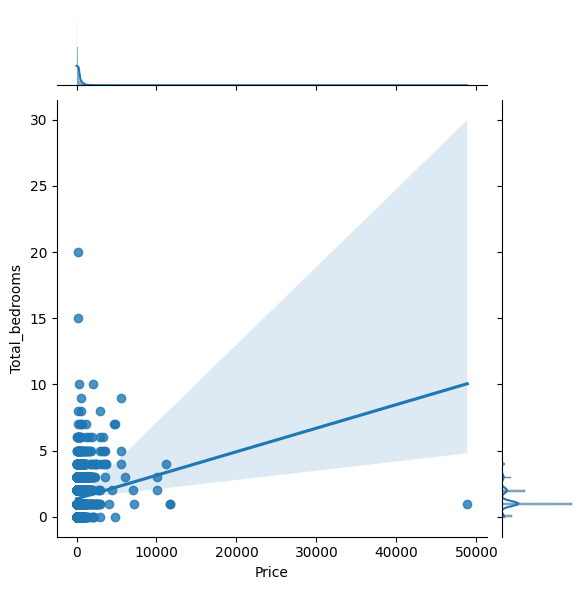

In [ ]:
# checking outliers
sns.jointplot(x='Price', y='Total_bedrooms', data=df, kind='reg')

In [ ]:
# removing outliers of price
df[df["Price"] > df["Price"].quantile(0.999)]["Price"]

737     11190.0
860     11681.0
1954    48842.0
2386    10001.0
3391    11681.0
3927    10001.0
Name: Price, dtype: float64

In [ ]:
df[df["Price"] > df["Price"].quantile(0.9999)]["Price"]

1954    48842.0
Name: Price, dtype: float64

In [ ]:
max = df["Price"].quantile(0.9999)
df = df[df["Price"] < max]

In [ ]:
df.shape

(5554, 27)

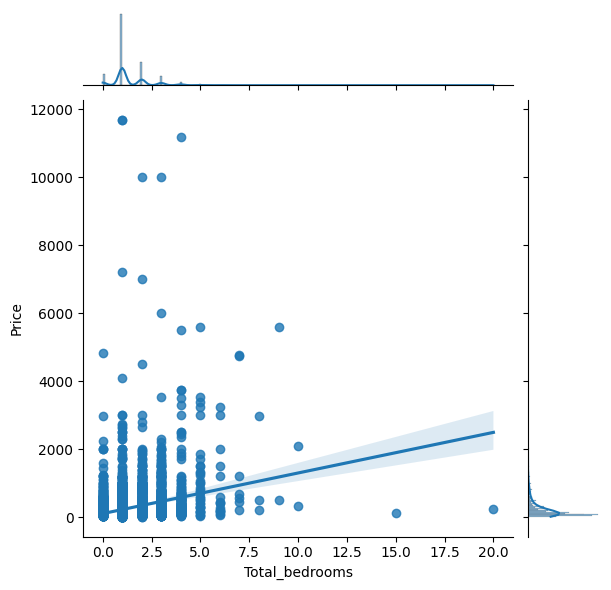

In [ ]:
sns.jointplot(x='Total_bedrooms', y='Price', data=df, kind='reg')

<Axes: xlabel='Room_type', ylabel='Price'>

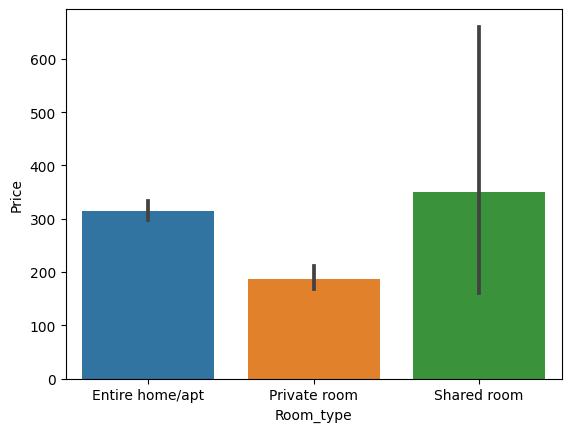

In [ ]:
sns.barplot(x='Room_type',y='Price',data=df, estimator=np.mean)

<Axes: xlabel='Room_type', ylabel='Security_deposit'>

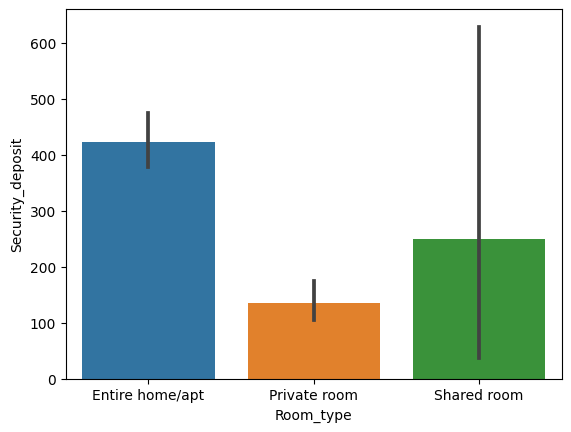

In [ ]:
sns.barplot(x='Room_type', y='Security_deposit',data=df, estimator=np.mean)

<Axes: xlabel='Room_type', ylabel='Review_Scores'>

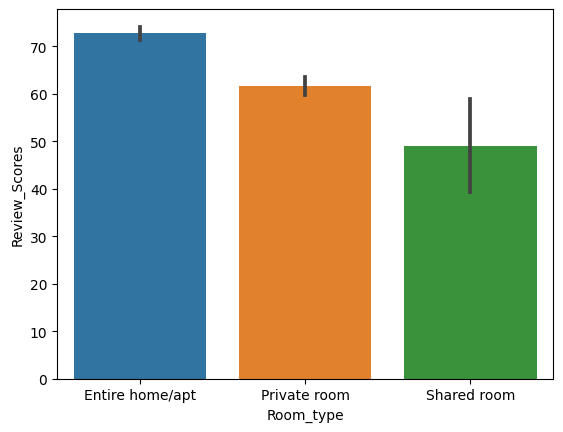

In [ ]:
sns.barplot(x='Room_type', y='Review_Scores',data=df, estimator=np.mean)

<Axes: xlabel='Room_type', ylabel='Availability_365'>

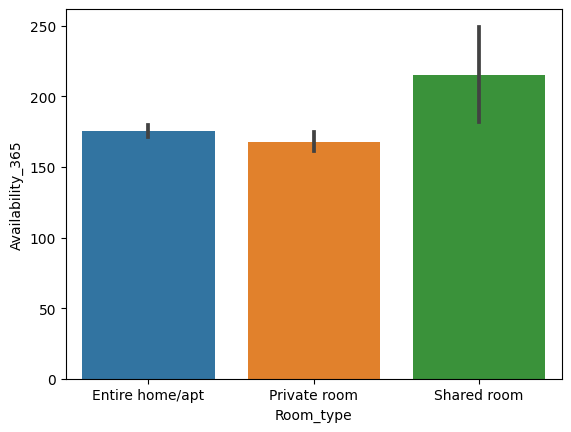

In [ ]:
sns.barplot(x='Room_type', y='Availability_365',data=df, estimator=np.mean)

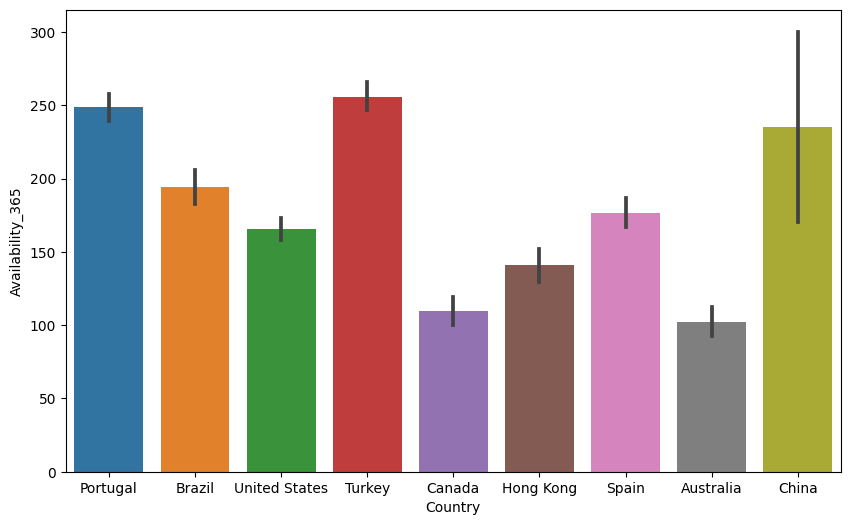

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Availability_365',data=df, estimator=np.mean)
plt.show()

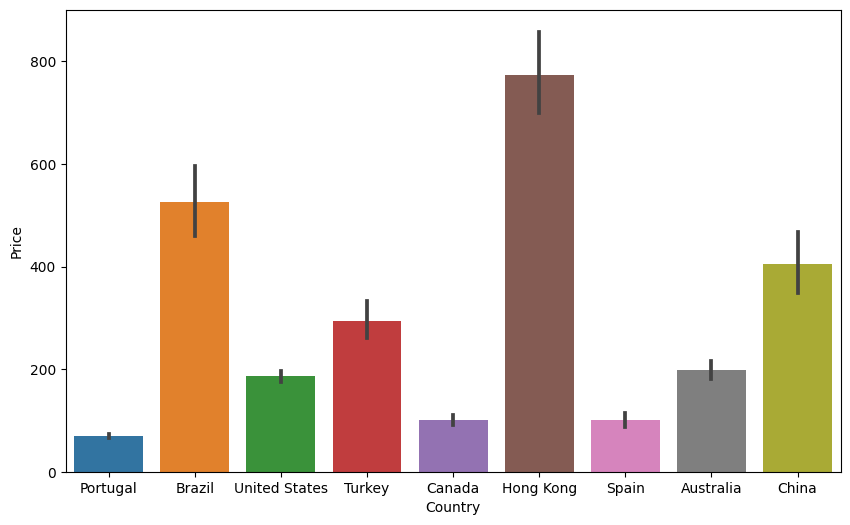

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Price',data=df, estimator=np.mean)
plt.show()

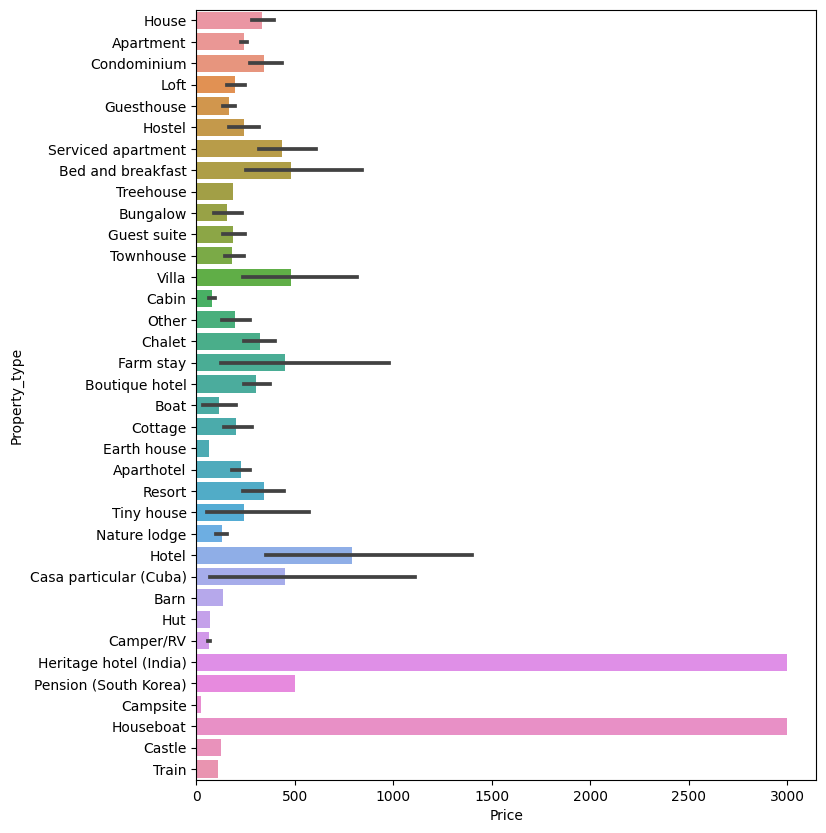

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Price',y='Property_type',data=df, estimator=np.mean)
plt.show()

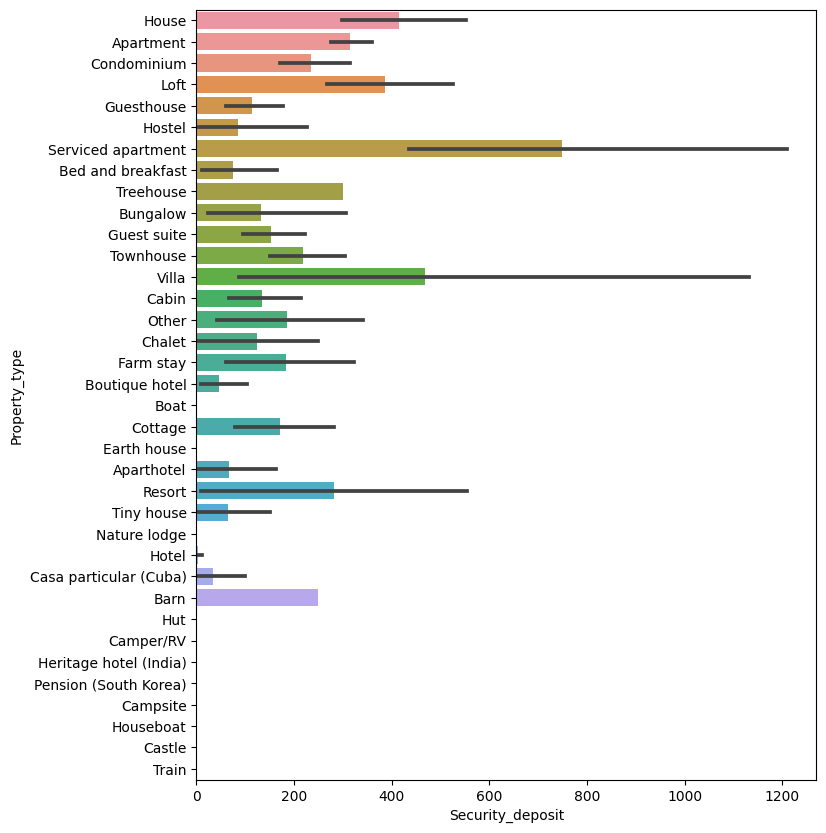

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Security_deposit',y='Property_type',data=df, estimator=np.mean)
plt.show()

In [ ]:
mean_order = df.groupby('Property_type')['Price'].mean().sort_values(ascending=False).index

In [ ]:
df['Total_bedrooms'].value_counts()

1.0     3307
2.0     1090
0.0      501
3.0      427
4.0      161
5.0       36
6.0       16
7.0        7
8.0        3
9.0        2
10.0       2
20.0       1
15.0       1
Name: Total_bedrooms, dtype: int64

In [ ]:
df.columns

Index(['Id', 'Name', 'Property_type', 'Room_type', 'Bed_type', 'Min_nights',
       'Max_nights', 'Cancellation_policy', 'Accomodates', 'Total_bedrooms',
       'Total_beds', 'Number_Of_Reviews', 'Price', 'Security_deposit',
       'Cleaning_fee', 'Extra_people', 'Guests_included', 'Image_Url',
       'Host_id', 'Host_name', 'Host_location', 'Country', 'Country_code',
       'Longitude', 'Latitude', 'Availability_365', 'Review_Scores'],
      dtype='object')